# Coorelation matrix

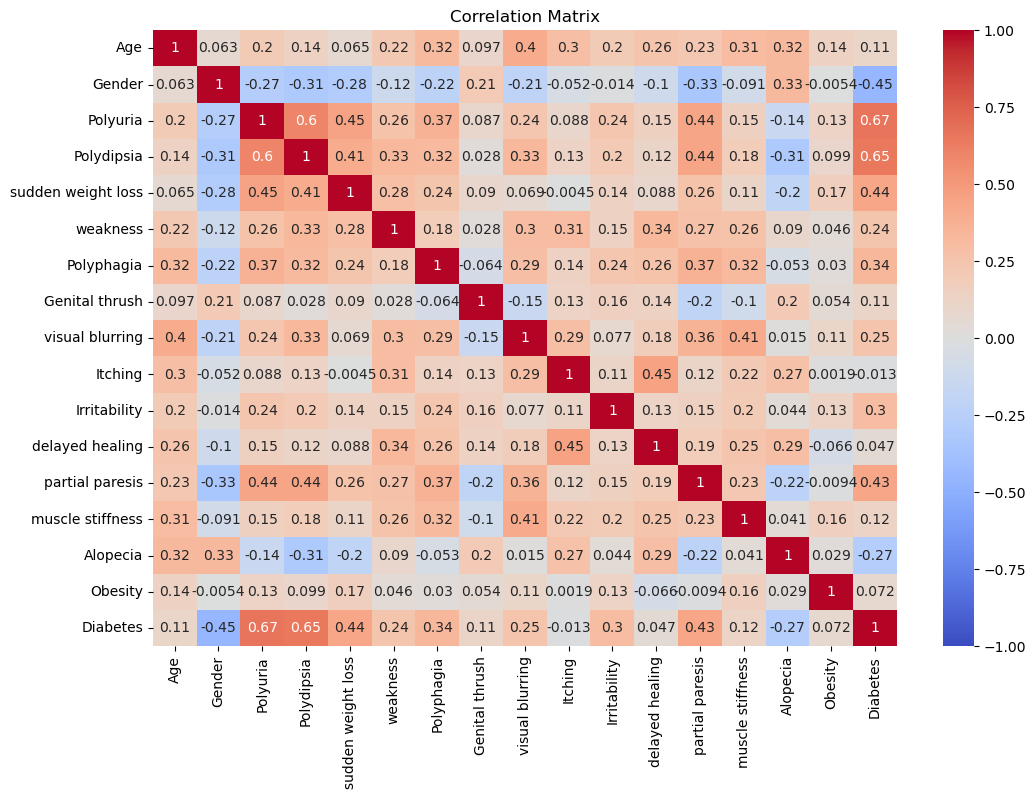

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
Dataset = pd.read_csv(r"D:\OMSCS\Machine learning_Fall_2023\Dataset_2.csv")
# Rename the 'class' column to 'Diabetes'
Dataset.rename(columns={'class': 'Diabetes'}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = Dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Matrix")
plt.show()


# Simulated Annealing

Training time for the model: 1.05 seconds
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.94      0.96      0.95        84

    accuracy                           0.94       130
   macro avg       0.94      0.93      0.93       130
weighted avg       0.94      0.94      0.94       130



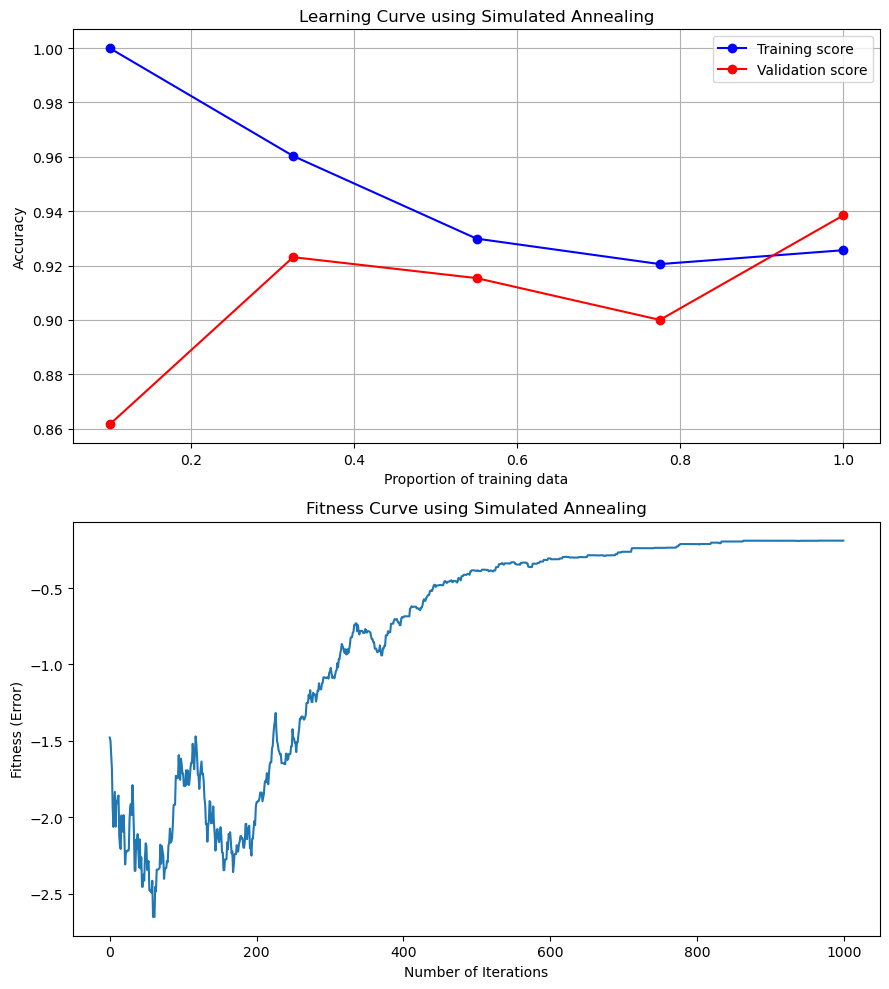

In [1]:
import mlrose
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
import time

Dataset = pd.read_csv(r"D:\OMSCS\Machine learning_Fall_2023\Dataset_2.csv")
scaler = StandardScaler()
X = scaler.fit_transform(Dataset.drop('class', axis=1))
X = pd.DataFrame(X, columns=Dataset.columns[:-1])
y = Dataset[['class']]
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define neural network object
nn_model = mlrose.NeuralNetwork(hidden_nodes=None, activation='relu', 
                                algorithm='simulated_annealing', 
                                max_iters=1000, bias=True, is_classifier=True, 
                                learning_rate=0.6, early_stopping=True, 
                                clip_max=5, max_attempts=100, 
                                random_state=42, curve=True)

# Train neural network
start_time = time.time()
nn_model.fit(X_train.values, y_train.values.ravel())
end_time = time.time()

# Print training time
training_time = end_time - start_time
print(f"Training time for the model: {training_time:.2f} seconds")

# Predict labels for test set and assess accuracy
y_pred = nn_model.predict(X_test.values)
print(classification_report(y_test, y_pred))

# Function to manually compute the learning curve
def compute_learning_curve(model, X, y, X_val, y_val, train_sizes):
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes:
        subset_size = int(train_size * len(X))
        X_subset = X[:subset_size]
        y_subset = y[:subset_size]
        
        model.fit(X_subset, y_subset)
        
        y_train_pred = model.predict(X_subset)
        y_val_pred = model.predict(X_val)
        
        train_score = accuracy_score(y_subset, y_train_pred)
        val_score = accuracy_score(y_val, y_val_pred)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        
    return train_scores, val_scores

train_sizes = np.linspace(0.1, 1.0, 5)
train_scores, val_scores = compute_learning_curve(nn_model, X_train.values, y_train.values.ravel(), X_test.values, y_test.values.ravel(), train_sizes)


# Plotting the manually computed learning curve
plt.figure(figsize=(9, 10))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores, 'o-', color='red', label='Validation score')
plt.title('Learning Curve using Simulated Annealing')
plt.xlabel('Proportion of training data')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc="best")

# Plotting the fitness curve
fitness_curve = nn_model.fitness_curve
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(fitness_curve)
plt.title('Fitness Curve using Simulated Annealing')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness (Error)')

# Display the plots
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()



# Random Hill Climb

Training time for the model: 0.38 seconds
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.93      0.94      0.93        84

    accuracy                           0.92       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.92      0.92      0.92       130



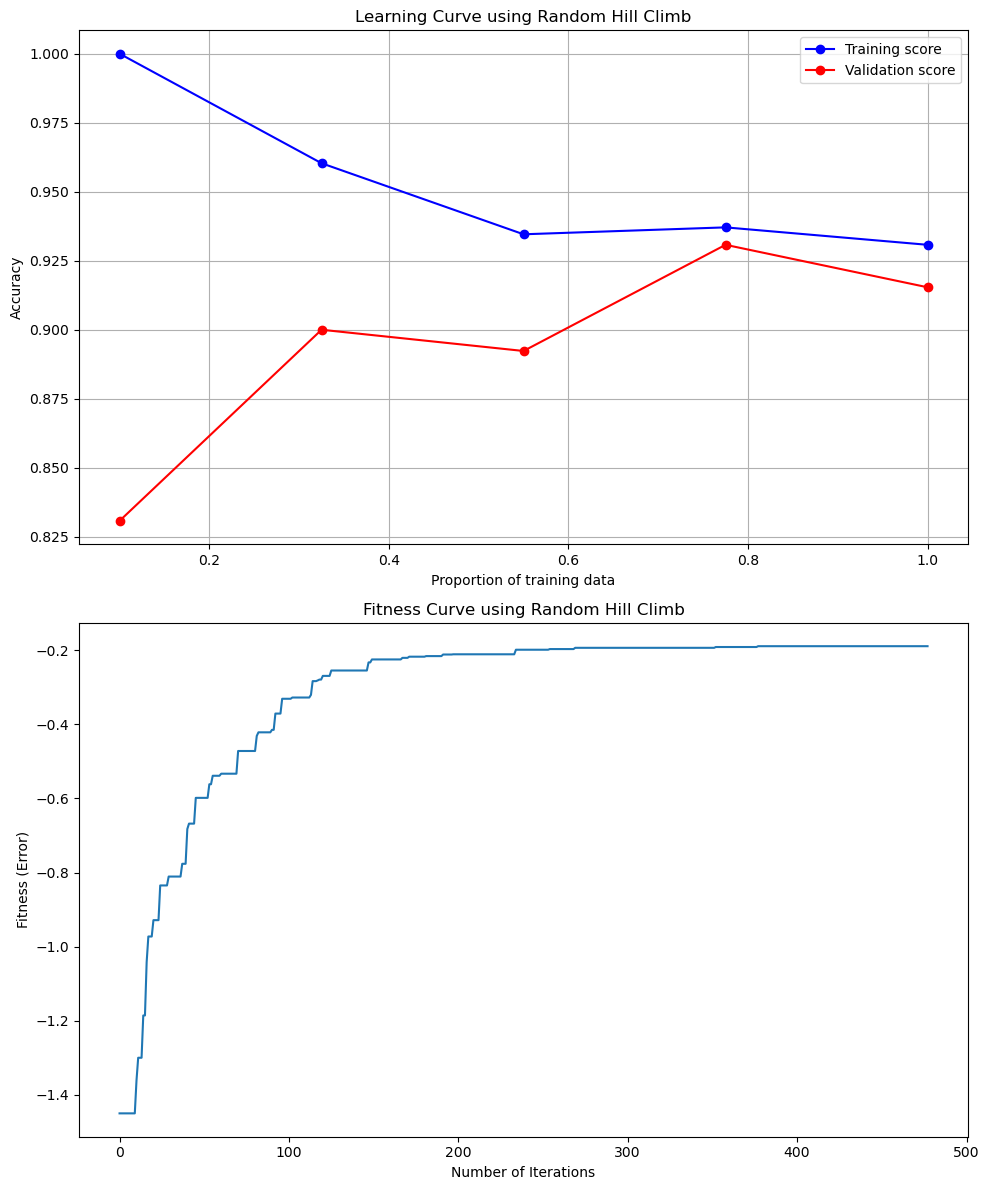

In [3]:
import mlrose
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
import time
Dataset = pd.read_csv(r"D:\OMSCS\Machine learning_Fall_2023\Dataset_2.csv")
scaler = StandardScaler()
X = scaler.fit_transform(Dataset.drop('class', axis=1))
X = pd.DataFrame(X, columns=Dataset.columns[:-1])
y = Dataset[['class']]
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define neural network object
nn_model = mlrose.NeuralNetwork(hidden_nodes=None, activation='relu', 
                                algorithm='random_hill_climb', 
                                max_iters=1000, bias=True, is_classifier=True, 
                                learning_rate=0.6, early_stopping=True, 
                                clip_max=5, max_attempts=100, 
                                random_state=42, curve=True)


# Train neural network
start_time = time.time()
nn_model.fit(X_train.values, y_train.values.ravel())
end_time = time.time()
# Print training time
training_time = end_time - start_time
print(f"Training time for the model: {training_time:.2f} seconds")
# Predict labels for test set and assess accuracy
y_pred = nn_model.predict(X_test.values)
print(classification_report(y_test, y_pred))

# Function to manually compute the learning curve
def compute_learning_curve(model, X, y, X_val, y_val, train_sizes):
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes:
        subset_size = int(train_size * len(X))
        X_subset = X[:subset_size]
        y_subset = y[:subset_size]
        
        model.fit(X_subset, y_subset)
        
        y_train_pred = model.predict(X_subset)
        y_val_pred = model.predict(X_val)
        
        train_score = accuracy_score(y_subset, y_train_pred)
        val_score = accuracy_score(y_val, y_val_pred)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        
    return train_scores, val_scores

train_sizes = np.linspace(0.1, 1.0, 5)
train_scores, val_scores = compute_learning_curve(nn_model, X_train.values, y_train.values.ravel(), X_test.values, y_test.values.ravel(), train_sizes)


# Create a figure with a 2x1 grid for vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the manually computed learning curve
ax1.plot(train_sizes, train_scores, 'o-', color='blue', label='Training score')
ax1.plot(train_sizes, val_scores, 'o-', color='red', label='Validation score')
ax1.set_title('Learning Curve using Random Hill Climb')
ax1.set_xlabel('Proportion of training data')
ax1.set_ylabel('Accuracy')
ax1.grid(True)
ax1.legend(loc="best")

# Plotting the fitness curve
fitness_curve = nn_model.fitness_curve
ax2.plot(fitness_curve)
ax2.set_title('Fitness Curve using Random Hill Climb')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('Fitness (Error)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Genetic Algrithm

Training time for the model: 16.95 seconds
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        46
           1       0.96      0.88      0.92        84

    accuracy                           0.90       130
   macro avg       0.89      0.91      0.89       130
weighted avg       0.91      0.90      0.90       130



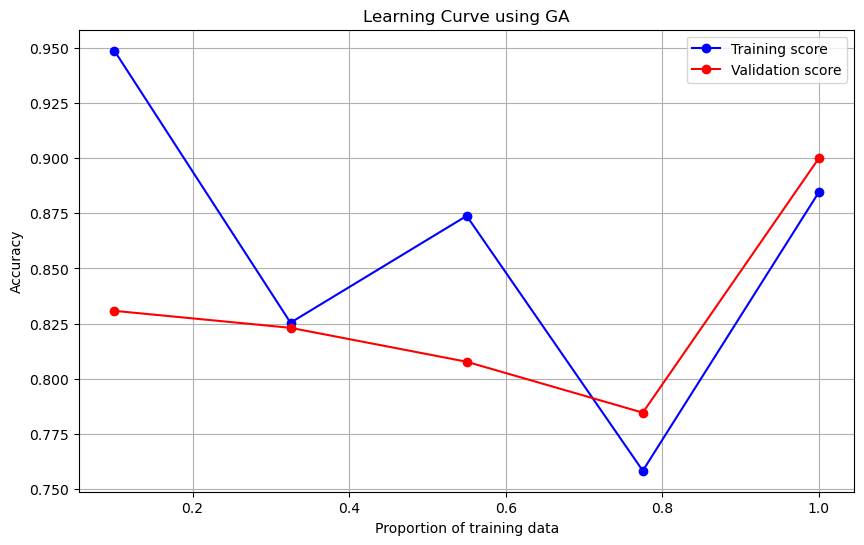

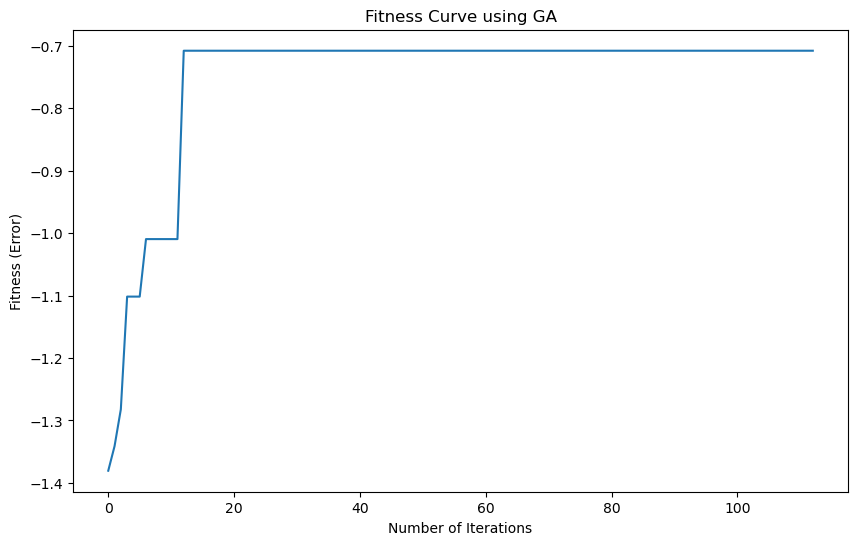

In [1]:
import mlrose
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
import time

Dataset = pd.read_csv(r"D:\OMSCS\Machine learning_Fall_2023\Dataset_2.csv")
scaler = StandardScaler()
X = scaler.fit_transform(Dataset.drop('class', axis=1))
X = pd.DataFrame(X, columns=Dataset.columns[:-1])
y = Dataset[['class']]
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define neural network object
nn_model = mlrose.NeuralNetwork(hidden_nodes=None, activation='relu', 
                                algorithm='genetic_alg', 
                                max_iters=5000, bias=True, is_classifier=True, 
                                learning_rate=0.6, early_stopping=True, 
                                clip_max=5, max_attempts=100,
                                mutation_prob=0.35,
                                random_state=42, curve=True)

# Train neural network
start_time = time.time()
nn_model.fit(X_train.values, y_train.values.ravel())
end_time = time.time()

# Print training time
training_time = end_time - start_time
print(f"Training time for the model: {training_time:.2f} seconds")

# Predict labels for test set and assess accuracy
y_pred = nn_model.predict(X_test.values)
print(classification_report(y_test, y_pred))

# Function to manually compute the learning curve
def compute_learning_curve(model, X, y, X_val, y_val, train_sizes):
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes:
        subset_size = int(train_size * len(X))
        X_subset = X[:subset_size]
        y_subset = y[:subset_size]
        
        model.fit(X_subset, y_subset)
        
        y_train_pred = model.predict(X_subset)
        y_val_pred = model.predict(X_val)
        
        train_score = accuracy_score(y_subset, y_train_pred)
        val_score = accuracy_score(y_val, y_val_pred)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        
    return train_scores, val_scores

train_sizes = np.linspace(0.1, 1.0, 5)
train_scores, val_scores = compute_learning_curve(nn_model, X_train.values, y_train.values.ravel(), X_test.values, y_test.values.ravel(), train_sizes)

# Plotting the manually computed learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores, 'o-', color='red', label='Validation score')
plt.title('Learning Curve using GA')
plt.xlabel('Proportion of training data')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc="best")
fitness_curve = nn_model.fitness_curve

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fitness_curve)
plt.title('Fitness Curve using GA')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness (Error)')

plt.show()


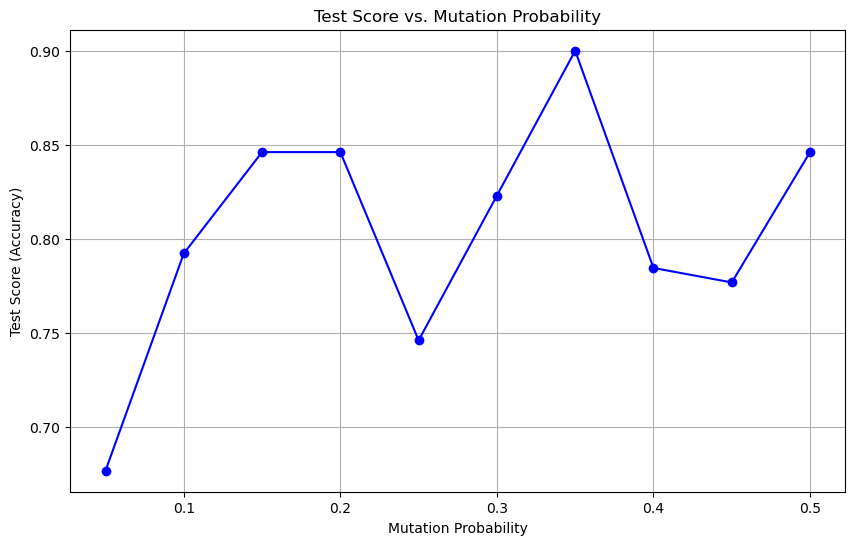

In [4]:
mutation_probs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # Adjust as necessary
test_scores = []

for mutation_prob in mutation_probs:
    nn_model = mlrose.NeuralNetwork(hidden_nodes=None, activation='relu', 
                                    algorithm='genetic_alg', 
                                    max_iters=1000, 
                                    bias=True, 
                                    is_classifier=True, 
                                    learning_rate=0.6, 
                                    early_stopping=True, 
                                    clip_max=5, 
                                    max_attempts=100, 
                                    mutation_prob=mutation_prob,
                                    random_state=42, 
                                    curve=True)
    
    nn_model.fit(X_train.values, y_train.values.ravel())
    y_pred = nn_model.predict(X_test.values)
    test_score = accuracy_score(y_test, y_pred)
    test_scores.append(test_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(mutation_probs, test_scores, 'o-', color='blue')
plt.title('Test Score vs. Mutation Probability')
plt.xlabel('Mutation Probability')
plt.ylabel('Test Score (Accuracy)')
plt.grid(True)
plt.show()
